# 1. 特征工程第一步：属性抽取（例1：图片属性抽取）

## 1.1 读取/显示图片

该图片对应的数据结构为:  <class 'numpy.ndarray'>
该图片矩阵的具体维数为: (184, 394, 3)
该图片矩阵部分内部数据为:  [[[59 71 69]
  [63 75 73]
  [67 79 77]
  ...
  [74 86 86]
  [81 91 90]
  [83 93 92]]]


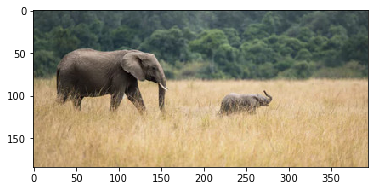

In [4]:
# 引入需要的库
# skimage 为图片处理库
# matplotlib 为画图所需要使用的库
from skimage import io  
from matplotlib import pyplot as plt


# 读取图片，读取完成后图片将会变成数组变量
img = io.imread('../images/elephant.jpg')

# 显示图片对应的变量信息
print('该图片对应的数据结构为: ', type(img))
print('该图片矩阵的具体维数为:', img.shape)
print('该图片矩阵部分内部数据为: ', img[:1])

# 显示图片
plt.imshow(img)

## 1.2 提取领域特定的特征

In [6]:
# 使用skimage库提供的算法进行图片特征提取
from skimage import feature

# 提取HOG特征
# 可参考: http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog
features = feature.hog(img, feature_vector=True, block_norm='L1')
print('HOG特征:', features)

HOG特征: [0.01311097 0.0086257  0.01545045 ... 0.00289741 0.00417187 0.02297248]


## 1.3 采用常规统计方法提取特征


In [10]:
import numpy as np
from skimage import measure

# 整体统计，统计各个通道的均值/方差
features_channels = [
    img[:, :, 0].mean(),img[:, :, 0].var(), 
    img[:, :, 1].mean(),img[:, :, 1].var(), 
    img[:, :, 2].mean(),img[:, :, 2].var(), 
]
print('整体统计特征:', features_channels)

# 基于 (100, 100, 1) 的固定窗口，计算每个窗口的最大值
features_blocks = measure.block_reduce(img, (100, 100, 1), np.max).reshape(-1).tolist()
print('局部统计特征:', features_blocks)

整体统计特征: [146.11482012800707, 4913.4551456253375, 135.6213308320459, 2622.4411936382876, 107.84000496579121, 1156.68264756122]
局部统计特征: [214, 187, 171, 250, 237, 228, 241, 223, 222, 235, 207, 177, 234, 201, 161, 242, 216, 194, 244, 219, 195, 247, 216, 177]


# 2. 特征工程第二步：数值转化

## 2.1 基于众数将标称属性转化为二元属性

In [12]:
from collections import Counter

data = ['上海', '上海', '成都', '重庆', '上海', '成都', '昆明', '上海', '成都', '上海', '深圳']

# 计算众数
mode = Counter(data).most_common(1)[0][0]
print('众数为:', mode)

# 转化为二元属性
data_bin = list(map(lambda x: x == mode, data))
print('转化后的二元属性为:', data_bin)

众数为: 上海
转化后的二元属性为: [True, True, False, False, True, False, False, True, False, True, False]


## 2.2 One-Hot 编码


In [14]:
import pandas as pd

# 使用pandas库的数据结构，便于计算
data_pd = pd.Series(data)

# 获取编码后的值
data_oh = pd.get_dummies(data_pd)
print('One-Hot 编码后的数据:\n', data_oh)

One-Hot 编码后的数据:
     上海  成都  昆明  深圳  重庆
0    1   0   0   0   0
1    1   0   0   0   0
2    0   1   0   0   0
3    0   0   0   0   1
4    1   0   0   0   0
5    0   1   0   0   0
6    0   0   1   0   0
7    1   0   0   0   0
8    0   1   0   0   0
9    1   0   0   0   0
10   0   0   0   1   0


## 2.3 基于中位数将序数属性转化为二元属性

In [15]:
data2 = ['小杯', '小杯', '超大杯', '中杯', '大杯', '小杯', '大杯']

# 将字符串映射成数字，保留序数属性的顺序关系，便于求解中位数
def cup_to_str(cupstr):
    if cupstr == '小杯':
        return 0
    elif cupstr == '中杯':
        return 1
    elif cupstr == '大杯':
        return 2
    else:
        return 3

data2_num = list(map(cup_to_str, data2))

# 寻找中位数
med = np.median(data2_num)
print('中位数为:', med)

# 根据中位数切分为二元属性
data2_bin = list(map(lambda x: x <= med, data2_num))
print('转化后的二元属性为:', data2_bin)

中位数为: 1.0
转化后的二元属性为: [True, True, False, True, False, True, False]


# 3. 特征工程第三步：特征优化与数据可视化

## 3.1 空值处理

In [18]:
data3 = pd.DataFrame([
    [1, 2, 3, None, 99],
    [4, 9, 16, 78, 234],
    [2, 34, 888, 73, None],
    [None, 76, 1, 0, 7],
    [8, 67, 77, 8, 1243]
])

# 去除包含空值的行或列
data3_drop1 = data3.dropna(axis=0)
data3_drop2 = data3.dropna(axis=1)
print('去除包含空值的行后数据为:\n', data3_drop1)
print('去除包含空值的列后数据为:\n', data3_drop2)

# 使用均值填充空值
data3_fill = data3.fillna(data3.mean())
print('使用均值填充空值后的数据:\n', data3_fill)

去除包含空值的行后数据为:
      0   1   2     3       4
1  4.0   9  16  78.0   234.0
4  8.0  67  77   8.0  1243.0
去除包含空值的列后数据为:
     1    2
0   2    3
1   9   16
2  34  888
3  76    1
4  67   77
使用均值填充空值后的数据:
       0   1    2      3        4
0  1.00   2    3  39.75    99.00
1  4.00   9   16  78.00   234.00
2  2.00  34  888  73.00   395.75
3  3.75  76    1   0.00     7.00
4  8.00  67   77   8.00  1243.00


## 3.2 去除特征量纲

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 最大最小值缩放
data3_scale = MinMaxScaler().fit_transform(data3_fill)
print('最大最小值缩放后的数据:\n', data3_scale)

# 标准化
data3_stand = StandardScaler().fit_transform(data3_fill)
print('标准化后的数据:\n', data3_stand)

最大最小值缩放后的数据:
 [[0.         0.         0.00225479 0.50961538 0.07443366]
 [0.42857143 0.09459459 0.01691094 1.         0.18365696]
 [0.14285714 0.43243243 1.         0.93589744 0.31452265]
 [0.39285714 1.         0.         0.         0.        ]
 [1.         0.87837838 0.08568207 0.1025641  1.        ]]
标准化后的数据:
 [[-1.14682928 -1.19503465 -0.55970616  0.         -0.66920412]
 [ 0.10425721 -0.96005593 -0.52220008  1.19104564 -0.36476417]
 [-0.72980045 -0.1208462   1.99359255  1.0353534   0.        ]
 [ 0.          1.28902614 -0.56547632 -1.23775331 -0.87667431]
 [ 1.77237252  0.98691064 -0.34620999 -0.98864573  1.91064259]]


## 3.3 去除低效特征

In [26]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

# 去除方差小于阈值的特征
data3_fs1 = VarianceThreshold(threshold=0.15).fit_transform(data3_scale)
print('去除方差小于阈值的特征后的数据:\n', data3_fs1)

# 去除与标记相关性较小的特征
labels = [1, 1, 0, 0, 1]
data3_fs2 = SelectKBest(chi2, k=2).fit_transform(X=data3_scale, y=labels)
print('去除与标记相关性较小的特征后的数据:\n', data3_fs2)

去除方差小于阈值的特征后的数据:
 [[0.         0.00225479 0.50961538]
 [0.09459459 0.01691094 1.        ]
 [0.43243243 1.         0.93589744]
 [1.         0.         0.        ]
 [0.87837838 0.08568207 0.1025641 ]]
去除与标记相关性较小的特征后的数据:
 [[0.         0.00225479]
 [0.09459459 0.01691094]
 [0.43243243 1.        ]
 [1.         0.        ]
 [0.87837838 0.08568207]]


# 3.4 特征降维

In [29]:
from sklearn.decomposition import PCA, FactorAnalysis

# 使用PCA降维
data3_dec1 = PCA(n_components=3).fit_transform(data3_stand)
print('PCA降维后的数据:\n', data3_dec1)

# 使用FA降维
data3_dec2 = FactorAnalysis(n_components=3).fit_transform(data3_stand)
print('FA降维后的数据:\n', data3_dec2)

PCA降维后的数据:
 [[-1.3753109  -1.02265434 -0.38342597]
 [-1.03929915 -0.08399741 -1.14377784]
 [-1.39073432  1.67621519  0.92128254]
 [ 0.99715921 -1.34555969  1.17962812]
 [ 2.80818517  0.77599624 -0.57370685]]
FA降维后的数据:
 [[-1.13041193 -0.92373308  0.38694992]
 [-0.40481775 -0.89013986 -0.88594835]
 [-0.76117444  1.81216452 -0.28872756]
 [ 0.75421767  0.03528652  1.72066105]
 [ 1.54218645 -0.03357811 -0.93293506]]
